In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
homedir = os.getenv("HOME")

I realized at the 11th hour that we are artificially cutting the sample for paper 2 based on the location of the MIPS scans in paper 1.  We are not using anything about the MIPS data here, so this doesn't make sense


* started with ~/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-vizier.fits
  * GSWLC
  * no DR10 AGN
  * Simard tab1
  
  
* match to Simard table 3 (we need ellipticity from simard+2011 table 3)
  * Simard tab3 ~/research/Simard2011/Simard2011-table3-vizier.fits
  * matching parameters
      * 10 arc offset
      * Best match, symmetric
      * join type: 1 and 2
  * 615299 pairs
  * save as ~/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-vizier.fits

* match to A100
  * match result of above to ~/research/APPSS/tables/A100-HIdef-28-Aug-2021.fits
  * A100 (didn't limit sample based on this - just added columns for those in A100)
    * 10 arcsec offset
    * Best match symmetric 
    * join type- All from 1 (tab1  = GSWLC+Simard table)
    * 14277 matches
  * write this as homedir+'/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-vizier-A100-HIdef-28Aug2021.fits'
  
* wrote program to grab galaxies within
  * $\Delta v/\sigma < 3$
  * $\Delta r/R_{200} < 3$
  
* saved file as
  * /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100.fits
  

In [48]:
os.chdir('/home/rfinn/research/LCS/tables/')
%run ~/github/LCS/python/getLCScat.py 


number of matches in MKW11 = 86
number of matches in MKW8 = 170
number of matches in AWM4 = 58
number of matches in A2063 = 355
number of matches in A2052 = 224
number of matches in NGC6107 = 176
number of matches in Coma = 972
number of matches in A1367 = 462
number of matches in Hercules = 531

total sample size = 3034
total sample size = 2955


<Figure size 489.6x360 with 0 Axes>

# match to LCSsizes in topcat


* match LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100.fits
* to LCS_all_size_KE_sfr.fits (in research/LCS/tables directory, again adding columns but not requiring a match)
  * topcat parameters
      * 10 arcsec offset
      * best match, symmetric
      * all from 1
  * 1291/1800 galaxies from paper1 sample are matched
  * saved as /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes.fits (2955 rows)
  
* save as /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes.fits

In [ ]:
# in topcat

# Program to fix colnames so they are the same as in original file

```
intab.rename_column('DR_R200_1','DR_R200')

```

In [49]:
os.chdir('/home/rfinn/research/LCS/tables/')
%run ~/github/LCS/python/LCSfix_colnames_forv2.py

In [50]:
os.chdir('/home/rfinn/research/LCS/tables/')
fixtab = Table.read('LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes-fixednames.fits')

# Run analysis

* created a new version of program in case all hell breaks loose
  * lcs_paper2_v2.py

In [68]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number of core galaxies =  194
	 with size measurements =  66
number of infall galaxies =  433
	 with size measurements =  53
number of GSW galaxies =  11900


In [70]:
lcsBTflag = b.lcs.cat['__B_T_r'] < 0.4

print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & lcsBTflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & lcsBTflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

number of core galaxies =  112
	 with size measurements =  66
number of infall galaxies =  284
	 with size measurements =  53
number of GSW galaxies =  11900


In [79]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75 --HIdef
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number of core galaxies =  115
	 with size measurements =  54
number of infall galaxies =  289
	 with size measurements =  45
number of GSW galaxies =  8872


<Figure size 489.6x360 with 0 Axes>

# Statistics for Table 1

In [147]:

# checking to see where we lose the difference between mass distributions
# mass distributions are different only at the lowest mass end
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip .75
b.ks_stats()


print()
print('#################################################')
print('#################################################')
print('WITH MASS MATCHING')
print('#################################################')
print('#################################################')
b.ks_stats(massmatch=True)

%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .4 --minmass 9.7 --ellip .75
b.ks_stats()

print()
print('#############################################')
print('WITH MASS MATCHING')
print('#############################################')
b.ks_stats(massmatch=True)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11

#################################################
#################################################
WITH MASS MATCHING
#################################################
#################################################
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
162

In [150]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.17e-01, pvalue = 4.24e-17

LCS Core vs Field: dSFR
	D = 3.16e-01, pvalue = 5.40e-17

LCS Core vs Field: Mstar
	D = 1.23e-01, pvalue = 6.17e-03

LCS Core vs Field: BT
	D = 2.11e-01, pvalue = 8.39e-08
########################################
LCS Infall vs Field: SFR
	D = 2.31e-01, pvalue = 1.02e-19

LCS Infall vs Field: dSFR
	D = 2.32e-01, pvalue = 5.65e-20

LCS Infall vs Field: Mstar
	D = 4.27e-02, pvalue = 4.31e-01

LCS Infall vs Field: BT
	D = 1.46e-01, pvalue = 3.97e-08

########################################
LCS Core vs Infall: SFR
	D = 1.43e-01, pvalue = 7.22e-03
LCS Core vs Infall: dSFR
	D = 1.51e-01, pvalue = 3.97e-03
LCS Core vs Infall: Mstar
	D = 9.60e-02, pvalue = 1.56e-01
LCS Core vs Infall: BT
	D = 1.19e-01, pvalue = 4.02e-02
########################################
LCS Core vs Field: SFR
	D = 3.45e-01, pvalue = 1.17e-10

LCS Core vs Field: dSFR
	D = 3.35e-01, pvalue = 4.82e-10

LCS Core vs Field: Mstar

# Figure 1

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number in lcs sample =  194
number in gsw sample =  11900
just checking ... 11899 194
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 6.191e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.32
p-vale = 4.257e-17 (prob that samples are from same distribution)


number in lcs sample =  433
number in gsw s

<Figure size 489.6x360 with 0 Axes>

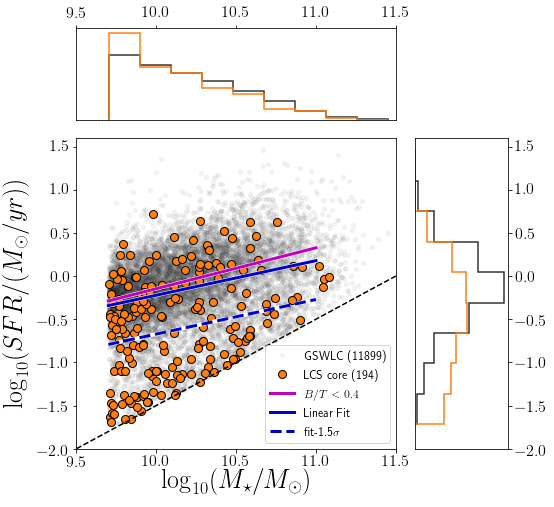

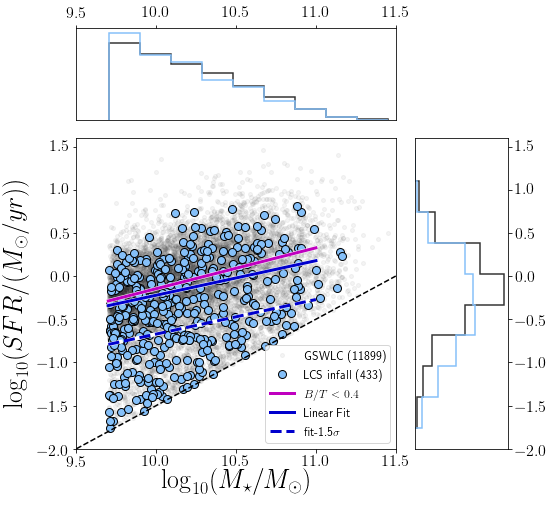

In [154]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False)

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
#plt.figure()
#make_venn()

### with BT < 0.4 cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in lcs sample =  115
number in gsw sample =  8872
just checking ... 8872 115
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.14
p-vale = 2.876e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.25
p-vale = 1.310e-06 (prob that samples are 

<Figure size 489.6x360 with 0 Axes>

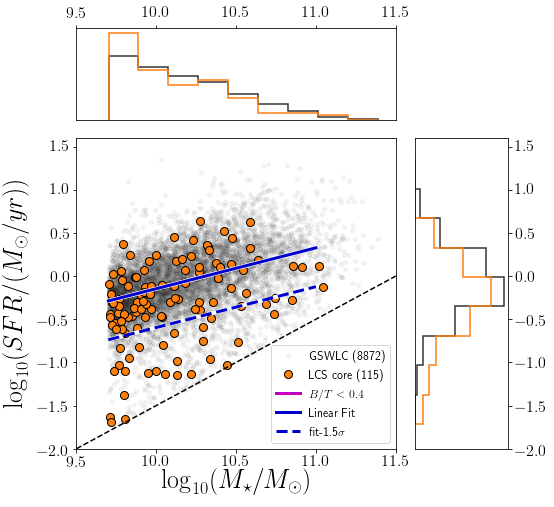

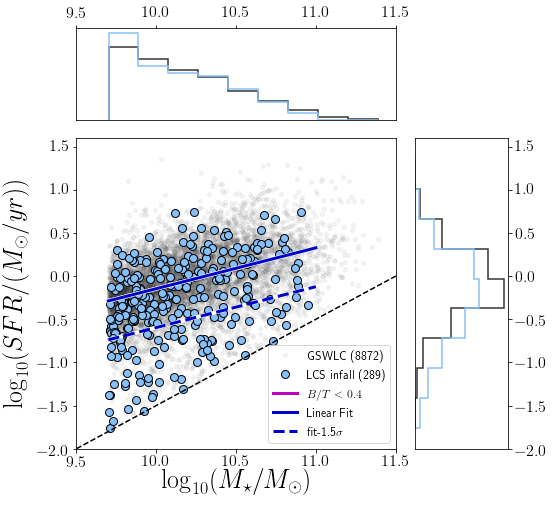

In [155]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --cutBT --BT 0.4



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False)

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
#plt.figure()
#make_venn()

# Figure 2

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11

Field: median = 0.04-0.00+0.00 (bootstrap)
Field: mean, std, std_err = -0.01,0.42,0.00 


LCS Core: median = -0.31-0.06+0.08 (bootstrap)
LCS Core: mean, std, std_err = -0.36,0.55,0.04 


LCS Infall: median = -0.19-0.02+0.05 (bootstrap)
LCS Infall: mean, std, std_err = -0.22,0.50,0.02 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.316114528285541, pvalue=5.4022855238701666e-17)
Anderson_ksampResult(statistic=74.02431097166408, critical_values=a

<Figure size 489.6x360 with 0 Axes>

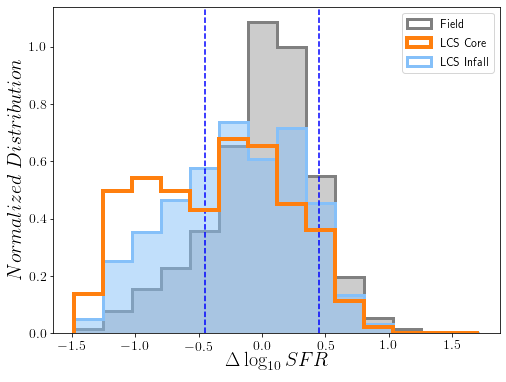

In [99]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# Figure 3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
CORE
frac suppressed = 0.44, -0.04,0.04
INFALL
0.325635103926097 [-0.02209593  0.02289945]
FIELD
0.1446218487394958 [-0.00319435  0.00325407]
(2,)
CORE
frac suppressed = 0.27, -0.04,0.04
INFALL
0.2640845070422535 [-0.02529874  0.02695429]
FIELD
0.08849052295044531 [-0.00298799  0.00308195]
(2,)


<Figure size 489.6x360 with 0 Axes>

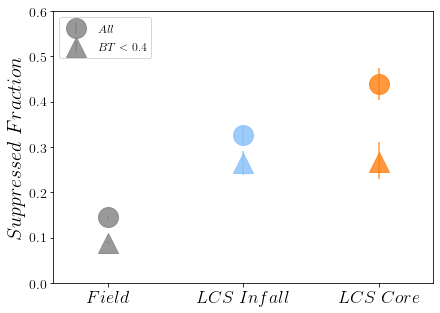

In [101]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
b.plot_frac_suppressed()#outfile1=outfile1,outfile2=outfile2,nbins=12)
btcut = 0.4
b.plot_frac_suppressed(BTcut=btcut,plotsingle=False)
plt.ylim(0,.6)
plt.legend(['$All$','_nolegend_','_nolegend_','$BT<0.4$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
Field : number of galaxies in normal sf subsample =  10179
2 2 3
Field : number of galaxies in suppressed sf subsample =  1721

LCS Core : number of galaxies in normal sf subsample =  109
2 2 3
LCS Core : number of galaxies in suppressed sf subsample =  85

LCS Infall : number of galaxies in normal sf subsample =  292
2 2 3
LCS Infall : number of galaxies in suppressed sf subsample =  141

Field : number of galaxies in normal sf subsample =  10179
2 2 6
F

<Figure size 489.6x360 with 0 Axes>

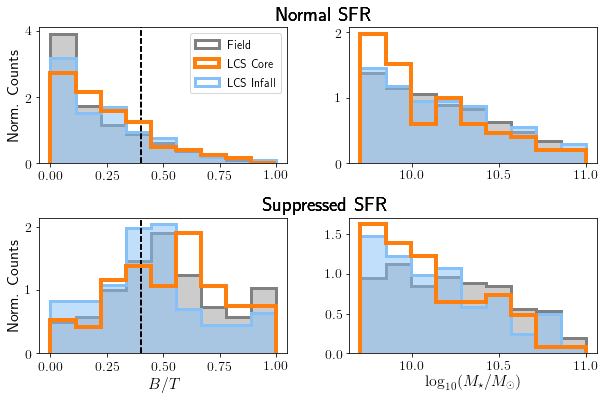

In [106]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.5031958163858222, pvalue=1.53738209665563e-198)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.04549676422484933, pvalue=0.004510983942156796)


<Figure size 489.6x360 with 0 Axes>

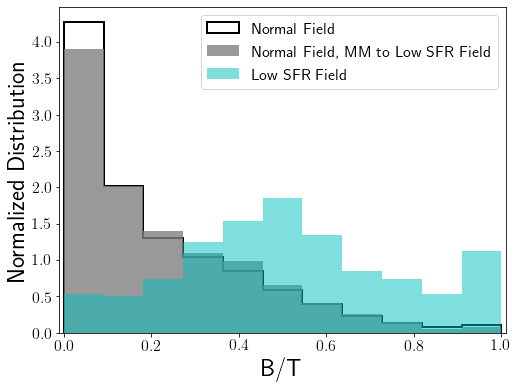

In [236]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
#########################
Without Sersic cut
#########################

Field
r=nan, pvalue=nan

LCS Core
r=-0.5165, pvalue=1.273e-14

LCS Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

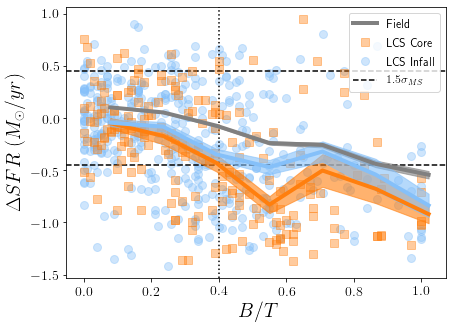

In [233]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 

print('#########################')
print('Without Sersic cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.4)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10

Field: median = -0.00-0.01+0.01 (bootstrap)
Field: mean, std, std_err = -0.01,0.34,0.00 


LCS Core: median = -0.17-0.03+0.02 (bootstrap)
LCS Core: mean, std, std_err = -0.21,0.45,0.04 


LCS Infall: median = -0.14-0.05+0.03 (bootstrap)
LCS Infall: mean, std, std_err = -0.20,0.45,0.03 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.24191986513506097, pvalue=2.471723673624915

<Figure size 489.6x360 with 0 Axes>

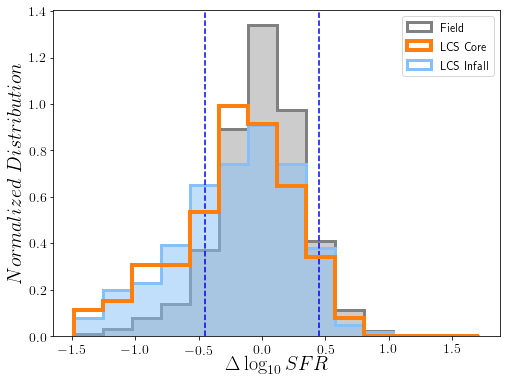

In [105]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75 
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# Figure 8

* can't make right now b/c did not propagate tempel into LCS catalog :(

* added tempel to LCS catalog, so pSc is available

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.08, pvalue=5.35e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.46210919696037855, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
#######################################################

<Figure size 489.6x360 with 0 Axes>

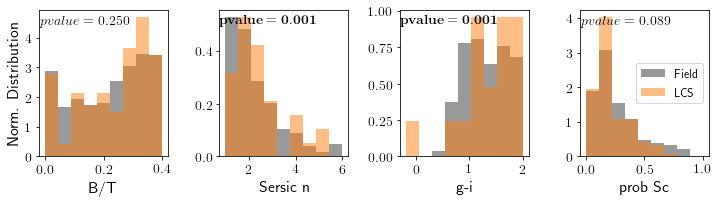

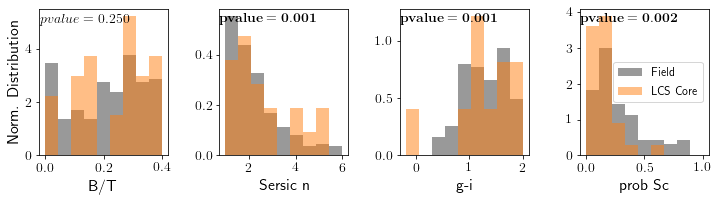

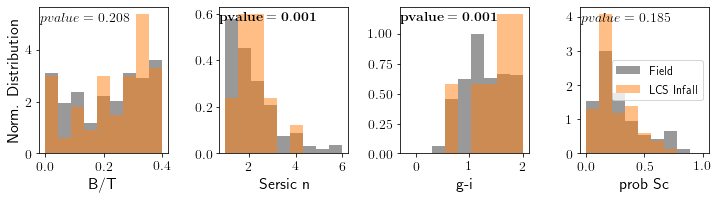

In [181]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

print()
print('TESTING')
print()
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

print()
print('TESTING')
print()
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)



# FIGURE 9 - FROM SIMULATIONS - SEPARATE NOTEBOOK

* Shows fraction of models with pvalues < 0.05 vs tau for a max infall time of 3 Gyr

* I can add the code here when we make the most clean version of this notebook

# Figure 10

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10

best-field line for field = -0.181+/-0.016

Spearman Rank test between dSFR and HIdef for field:
SpearmanrResult(correlation=-0.2073368104096989, pvalue=1.3888187832328736e-27)

Spearman Rank test between dSFR and HIdef for core:
SpearmanrResult(correlation=-0.11754385964912278, pvalue=0.6317641585079941)

Spearman Rank test between dSFR and HIdef for infall:
SpearmanrResult(correlati

<Figure size 489.6x360 with 0 Axes>

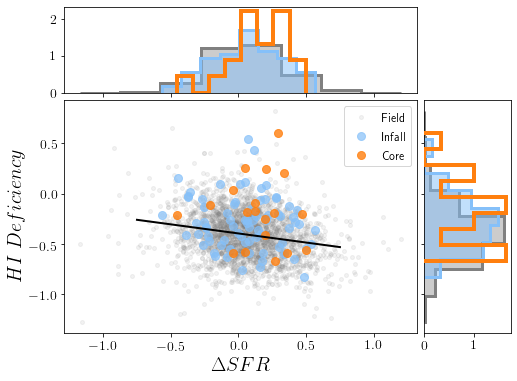

In [228]:
%%time
os.chdir('/home/rfinn/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --HIdef
b.compare_HIdef()

# Figure 11

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in parent sample =  404
number in low SFR sample =  107
number in normal SFR sample =  297
just checking, number of low sfr sample = 107
just checking, number of normal sfr sample = 297

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.5976044208956893, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=

<Figure size 489.6x360 with 0 Axes>

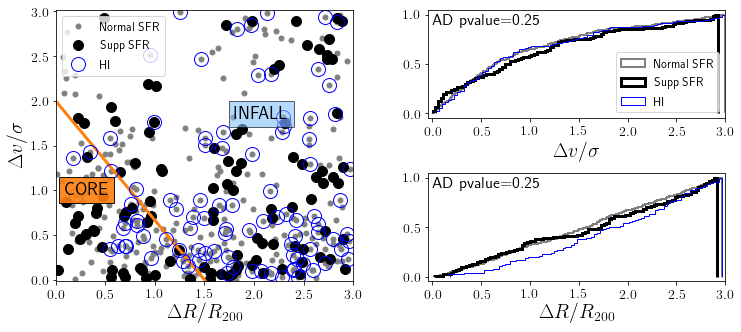

In [185]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=True)

# Make plot of fraction of suppressed galaxies vs Lx

* core only
* compare with field

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10


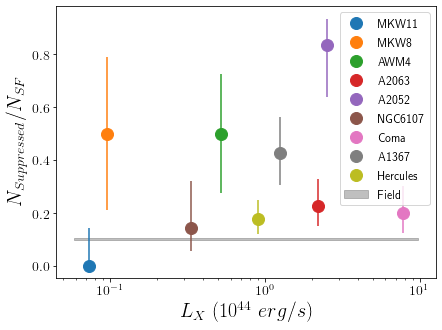

In [156]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/frac-suppressed-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-suppressed-Lx.pdf'
b.frac_suppressed_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11


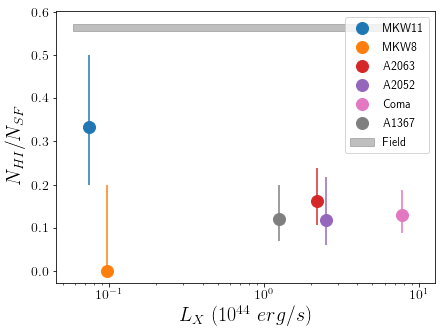

In [143]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/frac-HI-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-Lx.pdf'
b.frac_HI_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11


<Figure size 489.6x360 with 0 Axes>

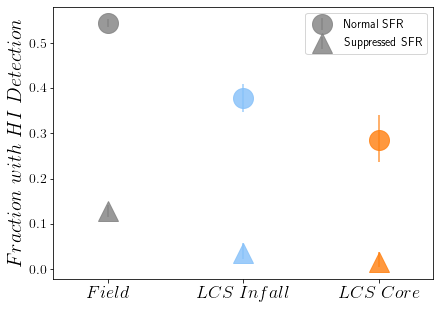

In [209]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
b.get_HIfrac_SFR_env(plotsingle=True)
figname1 = homedir+'/research/LCS/plots/frac-HI-SFR-env.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-SFR-env.pdf'
plt.savefig(figname1)
plt.savefig(figname2)

In [215]:
# number with HI detections

flag = b.gsw.HIdef['HIdef_flag'] & b.gsw_mass_sfr_flag
print('number of field galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.membflag & b.lcs_mass_sfr_flag
print('number of core galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.infallflag & b.lcs_mass_sfr_flag
print('number of infall galaxies w/HI detections = {}'.format(np.sum(flag)))

number of field galaxies w/HI detections = 3205
number of core galaxies w/HI detections = 23
number of infall galaxies w/HI detections = 94


(array([501.,  12.,   3.,   0.,   1.,   3.,   1.,   1.,   0.,   1.]),
 array([4.47671350e-04, 8.33522647e+00, 1.66700053e+01, 2.50047841e+01,
        3.33395629e+01, 4.16743417e+01, 5.00091205e+01, 5.83438993e+01,
        6.66786781e+01, 7.50134569e+01, 8.33482357e+01]),
 <a list of 10 Patch objects>)

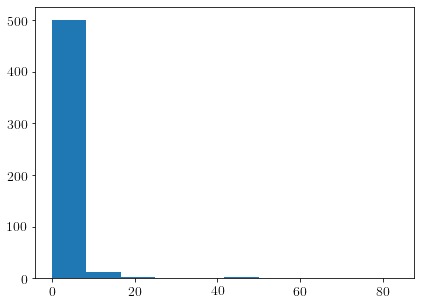

In [218]:
plt.figure()
flag = b.lcs.sizeratio > 0
plt.hist(b.lcs.sizeratio[flag])

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number in sampleflag =  191 2759
number in membflag =  1164 2759
number in both =  99
number in both and in sfr/mstar cut =  66
fraction of core with dsfr below 0.3dex = 0.167 (11/66)
fraction of core with dsfr below 0.3dex = 0.151 (8/53)
just checking ... 65 52
0.006496057179138259
0.0037493775867791157
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff00975b390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff02d214e50>)

<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

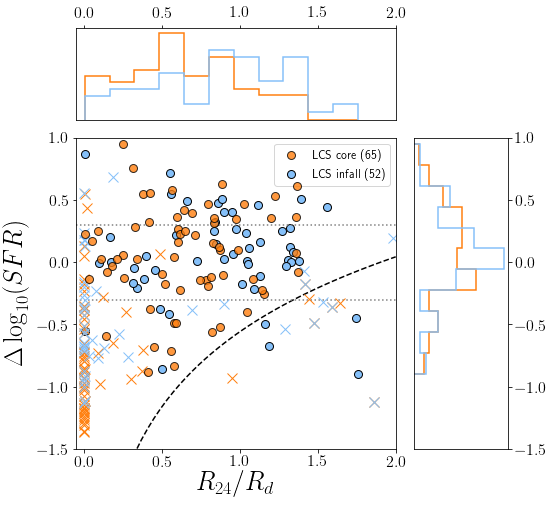

In [225]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/dsfr-sizeratio.png'
figname2 = homedir+'/research/LCS/plots/dsfr-sizeratio.pdf'
b.plot_dsfr_sizeratio(outfile1=figname1,outfile2=figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in sampleflag =  155 1626
number in membflag =  591 1626
number in both =  80
number in both and in sfr/mstar cut =  54
fraction of core with dsfr below 0.3dex = 0.148 (8/54)
fraction of core with dsfr below 0.3dex = 0.089 (4/45)
just checking ... 53 45
0.0334145746375488
0.0037493775867791157
############################################################# 
KS test comparising gal

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff01f4abb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff00a48db10>)

<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

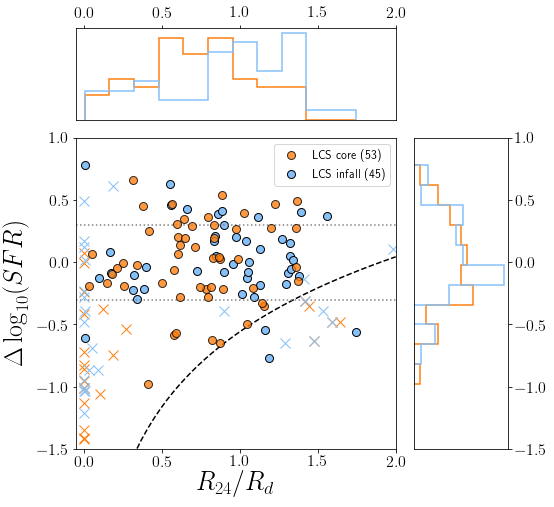

<Figure size 489.6x360 with 0 Axes>

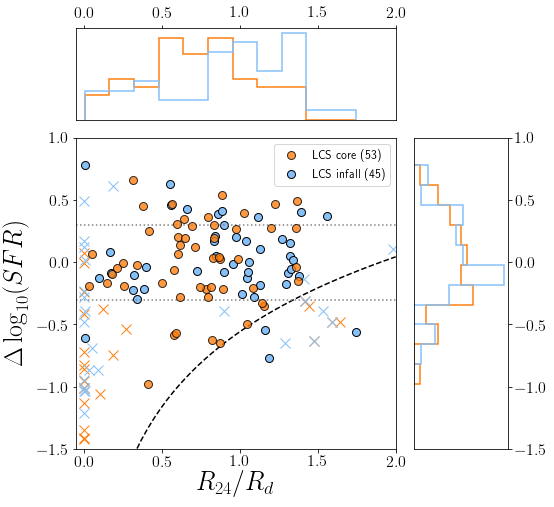

In [226]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --cutBT --BT 0.4
figname1 = homedir+'/research/LCS/plots/dsfr-sizeratio-BT0p4.png'
figname2 = homedir+'/research/LCS/plots/dsfr-sizeratio-BT0p4.pdf'
b.plot_dsfr_sizeratio(outfile1=figname1,outfile2=figname2)
b.plot_dsfr_sizeratio()